In [8]:
import os as os

In [9]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [16]:
os.chdir("C:\\Users\\litle\\OneDrive\\Desktop\\woking direectory")

In [17]:
os.getcwd()

'C:\\Users\\litle\\OneDrive\\Desktop\\woking direectory'

In [18]:
os.listdir()

['B_FI.csv',
 'Credit_Risk_Test_data.csv',
 'Credit_Risk_Train_data.csv',
 'Credit_Risk_Validate_data.csv',
 'Factor Analysis using the B_FI dataset-Copy1.ipynb',
 'house_price.csv',
 'IRIS.csv',
 'iris.data',
 'Iris.xls',
 'mtcars.csv',
 'snsdata.csv',
 'Super Store.csv',
 'train.csv']

In [22]:
cr_train=pd.read_csv("Credit_Risk_Train_data.csv")
cr_test=pd.read_csv("Credit_Risk_Test_data.csv")
cr_valid=pd.read_csv("Credit_Risk_Validate_data.csv")

In [23]:
print("Dimension of the training data",cr_train.shape)
print("Dimension of the validation data",cr_valid.shape)
print("Dimension of the test data",cr_test.shape)

Dimension of the training data (614, 13)
Dimension of the validation data (367, 13)
Dimension of the test data (367, 12)


In [24]:
cr_train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [25]:
cr_train.columns()

TypeError: 'Index' object is not callable

In [29]:
# rename the outcome to loan
cr_valid.rename(columns={"outcome":"Loan"},inplace=True)

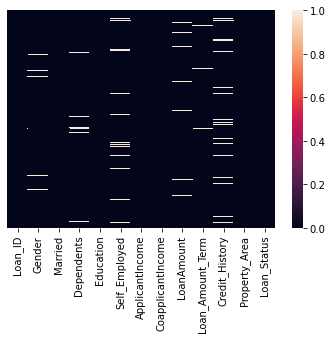

In [30]:
sns.heatmap(cr_train.isnull(), yticklabels=False,cbar=True)

In [33]:
cr_train.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [34]:
cr_train["Gender"].value_counts()

Male      489
Female    112
Name: Gender, dtype: int64

In [35]:
cr_train["Married"].value_counts()

Yes    398
No     213
Name: Married, dtype: int64

In [37]:
cr_train["Self_Employed"].value_counts()

No     500
Yes     82
Name: Self_Employed, dtype: int64

In [36]:
cr_train["Dependents"].value_counts()

0     345
1     102
2     101
3+     51
Name: Dependents, dtype: int64

In [38]:
cr_train["Education"].value_counts()

Graduate        480
Not Graduate    134
Name: Education, dtype: int64

In [39]:
cr_train["Credit_History"].value_counts()

1.0    475
0.0     89
Name: Credit_History, dtype: int64

In [40]:
cr_train.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [41]:
#Compute the loan value for
np.nanmedian(cr_train["LoanAmount"])

128.0

In [42]:
np.nanmedian(cr_train["Loan_Amount_Term"])

360.0

In [43]:
cr_train["LoanAmount"].fillna(128.0,inplace=True)
cr_train["Loan_Amount_Term"].fillna(360.0,inplace=True)


In [44]:
cr_train_dummy_cod=pd.get_dummies(cr_train.drop(["Loan_ID"],axis=1),drop_first=True)

In [45]:
cr_train_dummy_cod.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ApplicantIncome          614 non-null    int64  
 1   CoapplicantIncome        614 non-null    float64
 2   LoanAmount               614 non-null    float64
 3   Loan_Amount_Term         614 non-null    float64
 4   Credit_History           564 non-null    float64
 5   Gender_Male              614 non-null    uint8  
 6   Married_Yes              614 non-null    uint8  
 7   Dependents_1             614 non-null    uint8  
 8   Dependents_2             614 non-null    uint8  
 9   Dependents_3+            614 non-null    uint8  
 10  Education_Not Graduate   614 non-null    uint8  
 11  Self_Employed_Yes        614 non-null    uint8  
 12  Property_Area_Semiurban  614 non-null    uint8  
 13  Property_Area_Urban      614 non-null    uint8  
 14  Loan_Status_Y            6

In [46]:
cr_train_dummy_cod.head()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender_Male,Married_Yes,Dependents_1,Dependents_2,Dependents_3+,Education_Not Graduate,Self_Employed_Yes,Property_Area_Semiurban,Property_Area_Urban,Loan_Status_Y
0,5849,0.0,128.0,360.0,1.0,1,0,0,0,0,0,0,0,1,1
1,4583,1508.0,128.0,360.0,1.0,1,1,1,0,0,0,0,0,0,0
2,3000,0.0,66.0,360.0,1.0,1,1,0,0,0,0,1,0,1,1
3,2583,2358.0,120.0,360.0,1.0,1,1,0,0,0,1,0,0,1,1
4,6000,0.0,141.0,360.0,1.0,1,0,0,0,0,0,0,0,1,1


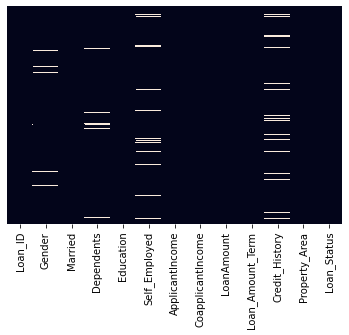

In [47]:
sns.heatmap(cr_train.isnull(),yticklabels=False,cbar=False)

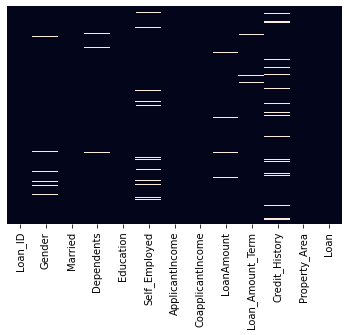

In [50]:
sns.heatmap(cr_valid.isnull(),yticklabels=False,cbar=False)

In [57]:
cr_valid["Gender"].fillna("Male",inplace=True)
cr_valid["Married"].fillna("Yes",inplace=True)
cr_valid["Dependents"].fillna("0",inplace=True)
cr_valid["Education"].fillna("Graduate",inplace=True)
cr_valid["Self_Employed"].fillna("No",inplace=True)
cr_valid["Credit_History"].fillna("1",inplace=True)


In [58]:
cr_train["LoanAmount"].fillna(128.0,inplace=True)
cr_train["Loan_Amount_Term"].fillna(360.0,inplace=True)


In [55]:
cr_valid_dummy_cod=pd.get_dummies(cr_valid.drop(["Loan_ID"],axis=)

SyntaxError: invalid syntax (<ipython-input-55-9458b4060da5>, line 1)

In [56]:
cr_test.isnull()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,True,False
4,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...
362,False,False,False,False,False,False,False,False,False,False,False,False
363,False,False,False,False,False,False,False,False,False,False,False,False
364,False,False,False,False,False,False,False,False,False,False,True,False
365,False,False,False,False,False,False,False,False,False,False,False,False


In [59]:
cr_train["LoanAmount"].fillna(128.0,inplace=True)
cr_train["Loan_Amount_Term"].fillna(360.0,inplace=True)


In [60]:
cr_test.isnull().sum()

Loan_ID               0
Gender               11
Married               0
Dependents           10
Education             0
Self_Employed        23
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            5
Loan_Amount_Term      6
Credit_History       29
Property_Area         0
dtype: int64

In [61]:
sns.heatmap(cr_test.isnull(),yticklabels=)

SyntaxError: invalid syntax (<ipython-input-61-07cd4f04c256>, line 1)

In [62]:
cr_valid_dummy_cod

NameError: name 'cr_valid_dummy_cod' is not defined

In [63]:
#descriptive statistics

In [64]:
x=cr_train["ApplicantIncome"]

In [66]:
y=cr_train["LoanAmount"]

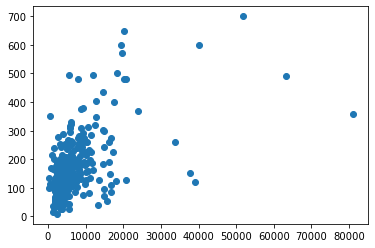

In [67]:
plt.scatter(x,y,)

In [68]:
cr_train.corr()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
ApplicantIncome,1.000000,-0.116605,0.565181,-0.046531,-0.014715
CoapplicantIncome,-0.116605,1.000000,0.189218,-0.059383,-0.002056
LoanAmount,0.565181,0.189218,1.000000,0.036960,-0.007543
Loan_Amount_Term,-0.046531,-0.059383,0.036960,1.000000,-0.003735
Credit_History,-0.014715,-0.002056,-0.007543,-0.003735,1.000000


In [69]:
cr_train["Gender"].value_counts()

Male      489
Female    112
Name: Gender, dtype: int64

In [70]:
sns.countplot_value_count

AttributeError: module 'seaborn' has no attribute 'countplot_value_count'

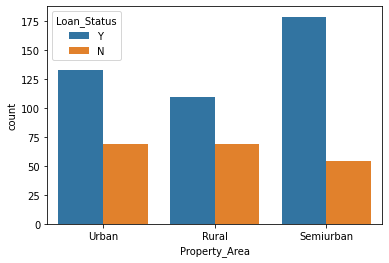

In [72]:
sns.countplot(x="Property_Area",hue="Loan_Status",data=cr_train)

In [73]:
from sklearn.linear_model import Logistic Regression
log_reg= LogisticRegression()
log_reg.fit(cr_train)

SyntaxError: invalid syntax (<ipython-input-73-7beaa3f23ce8>, line 1)

In [ ]:
prediction=log_reg.predict()